### IMPORTS ###

In [2]:
# Import Libraries
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib import pyplot as plt

### CLEANING ###

In [4]:
# Cleaning was handled in Subscore Analysis
data = pd.read_csv('../Datasets/clean.csv')

### AGE ANALYSIS ###

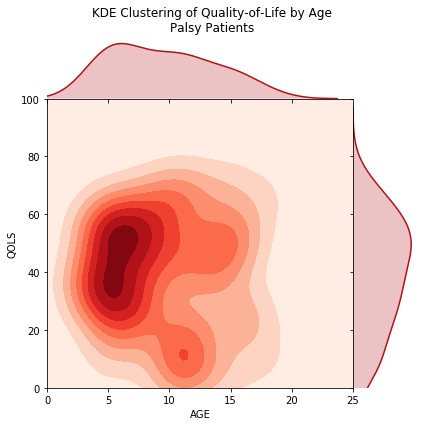

In [4]:
age_p = sns.jointplot(kind='kde',data=data[data['CEREBRAL PALSY TYPE'] != 0],x='AGE',y='QOLS',cmap='Reds',xlim=(0,25),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#B11218'})

age_p.ax_joint.set_facecolor('#FFECE4')
age_p.fig.subplots_adjust(top=.9)
age_p.fig.suptitle('KDE Clustering of Quality-of-Life by Age\nPalsy Patients')
plt.savefig('../Figures/age_palsy.png')
plt.show()

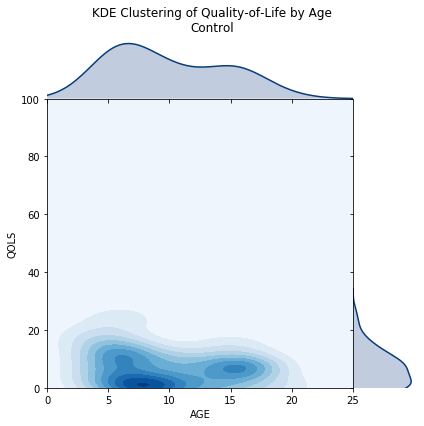

In [5]:
age_np = sns.jointplot(kind='kde',data=data[data['CEREBRAL PALSY TYPE'] == 0],x='AGE',y='QOLS',cmap='Blues',xlim=(0,25),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#083B7C'})

age_np.ax_joint.set_facecolor('#EEF5FC')
age_np.fig.subplots_adjust(top=.9)
age_np.fig.suptitle('KDE Clustering of Quality-of-Life by Age\nControl')
plt.savefig('../Figures/age_nopalsy.png')
plt.show()

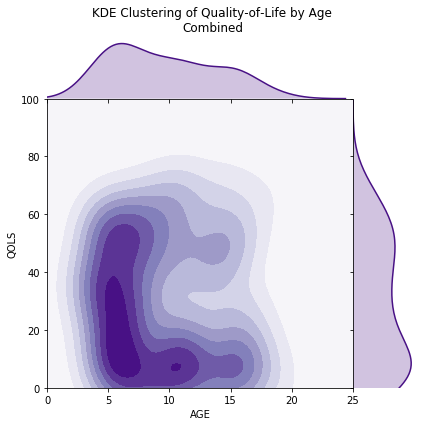

In [6]:
age_all = sns.jointplot(kind='kde',data=data,x='AGE',y='QOLS',cmap='Purples',xlim=(0,25),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#481185'})

age_all.ax_joint.set_facecolor('#F6F5F9')
age_all.fig.subplots_adjust(top=.9)
age_all.fig.suptitle('KDE Clustering of Quality-of-Life by Age\nCombined')
plt.savefig('../Figures/age_all.png')
plt.show()

### GENDER ANALYSIS ###

In [83]:
print(smf.ols('QOLS ~ C(GENDER)',data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   QOLS   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.774
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.158
Time:                        14:22:41   Log-Likelihood:                -416.64
No. Observations:                  93   AIC:                             841.3
Df Residuals:                      89   BIC:                             851.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.3000     10.912  

### ORAL HEALTH ANALYSIS ###

In [84]:
print(smf.ols('QOLS ~ BLEEDING',data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   QOLS   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     75.59
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.38e-13
Time:                        14:31:43   Log-Likelihood:                -391.22
No. Observations:                  93   AIC:                             786.4
Df Residuals:                      91   BIC:                             791.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8066      2.044      9.199      0.0

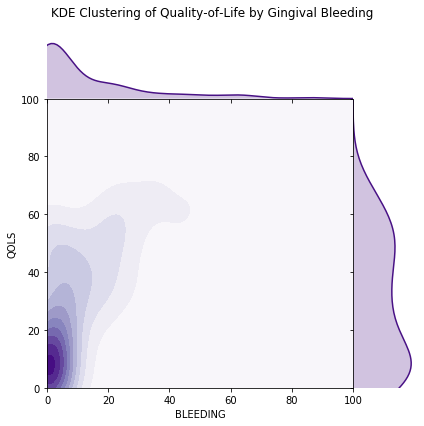

In [7]:
age_all = sns.jointplot(kind='kde',data=data,x='BLEEDING',y='QOLS',cmap='Purples',xlim=(0,100),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#481185'})

age_all.ax_joint.set_facecolor('#F6F5F9')
age_all.fig.subplots_adjust(top=.9)
age_all.fig.suptitle('KDE Clustering of Quality-of-Life by Gingival Bleeding')
plt.savefig('../Figures/bleeding.png')
plt.show()

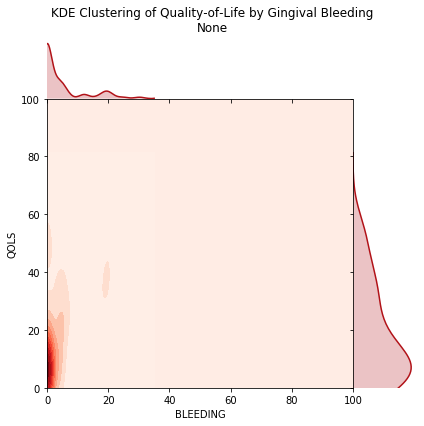

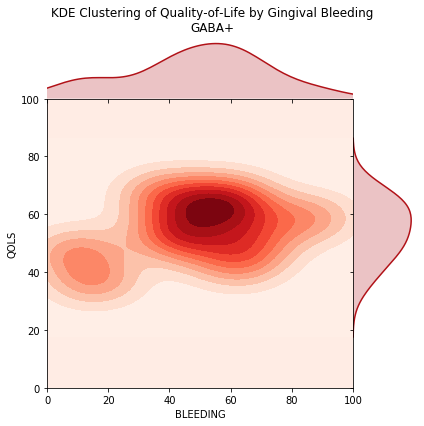

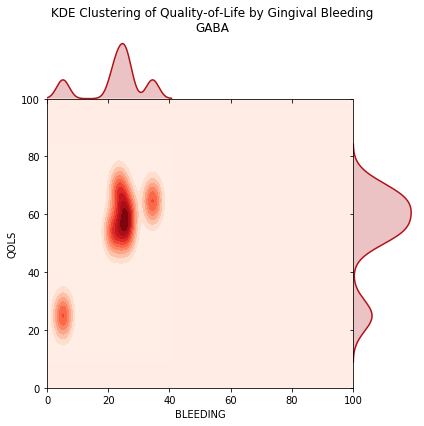

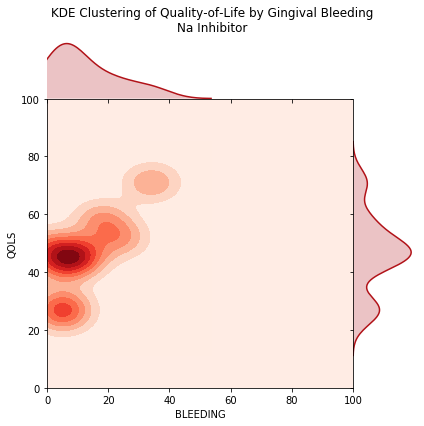

In [10]:
medication_dict = {
    0:'None',
    1:'GABA+',
    2:'GABA',
    3:'Na Inhibitor',
    4:'Ca Inhibitor'
}

for med_type in range(0,4):
    age_p = sns.jointplot(kind='kde',data=data[data['MEDICATION'] == med_type],x='BLEEDING',y='QOLS',cmap='Reds',xlim=(0,100),ylim=(0,100),n_levels=10,space=0,marginal_kws={'color':'#B11218'})

    age_p.ax_joint.set_facecolor('#FFECE4')
    age_p.fig.subplots_adjust(top=.9)
    age_p.fig.suptitle('KDE Clustering of Quality-of-Life by Gingival Bleeding\n{}' .format(medication_dict[med_type]))
    plt.savefig('../Figures/{}_bleeding_qols.png' .format(medication_dict[med_type]))
    plt.show()